##### The dataset includes information on the doses of vaccines administered, category of population vaccinated and the different vaccines used in India. The outcome of this project is the prediction of the number of people (above the age of 18) that will have been completely vaccinated on a given date in the future.

Note: For the purpose of simplicity, the population of people above the age of 18 is considered to be constant, which is approximately about 60% of the total population of India.

##### Preprocessing: This involves dropping the unwanted data, processing the NULL values, and converting the 'Updated On' column into a Date-Time Object.

In [321]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [322]:
df=pd.read_csv(r"D:\Documents\Notes\Github (Projects)\COVID-19 Vaccination analysis and prediction\covid_vaccine_statewise.csv")

In [323]:
df.head()

,Updated On,State,Total Doses Administered,Total Sessions Conducted,Total Sites,First Dose Administered,Second Dose Administered,Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Covaxin Administered,Total CoviShield Administered,Total Sputnik V Administered,AEFI,18-45 years (Age),45-60 years (Age),60+ years (Age),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,23757.0,24517.0,2.0,579.0,47697.0,NaN,NaN,NaN,NaN,NaN,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,27348.0,31252.0,4.0,635.0,57969.0,NaN,NaN,NaN,NaN,NaN,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,41361.0,58083.0,5.0,1299.0,98150.0,NaN,NaN,NaN,NaN,NaN,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,81901.0,113613.0,11.0,3017.0,192508.0,NaN,NaN,NaN,NaN,NaN,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,98111.0,153145.0,24.0,3946.0,247334.0,NaN,NaN,NaN,NaN,NaN,251280.0


In [324]:
df.count()

Updated On                             6699
State                                  6699
Total Doses Administered               6364
Total Sessions Conducted               6363
Total Sites                            6363
First Dose Administered                6363
Second Dose Administered               6363
Male(Individuals Vaccinated)           6363
Female(Individuals Vaccinated)         6363
Transgender(Individuals Vaccinated)    6363
Total Covaxin Administered             6363
Total CoviShield Administered          6363
Total Sputnik V Administered           1737
AEFI                                   4180
18-45 years (Age)                      4177
45-60 years (Age)                      4178
60+ years (Age)                        4178
Total Individuals Vaccinated           6363
dtype: int64

In [325]:
df.dropna(thresh=4, inplace=True)

In [326]:
df.drop(columns=["18-45 years (Age)", "45-60 years (Age)", "60+ years (Age)", "Total Individuals Vaccinated", "AEFI"], inplace=True)
df.head()

,Updated On,State,Total Doses Administered,Total Sessions Conducted,Total Sites,First Dose Administered,Second Dose Administered,Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Covaxin Administered,Total CoviShield Administered,Total Sputnik V Administered
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,23757.0,24517.0,2.0,579.0,47697.0,NaN
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,27348.0,31252.0,4.0,635.0,57969.0,NaN
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,41361.0,58083.0,5.0,1299.0,98150.0,NaN
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,81901.0,113613.0,11.0,3017.0,192508.0,NaN
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,98111.0,153145.0,24.0,3946.0,247334.0,NaN


In [327]:
df_india=df[df['State']=='India']
df_states=df[df['State']!='India']

In [328]:
df_india.count()

Updated On                             172
State                                  172
Total Doses Administered               172
Total Sessions Conducted               172
Total Sites                            172
First Dose Administered                172
Second Dose Administered               172
Male(Individuals Vaccinated)           172
Female(Individuals Vaccinated)         172
Transgender(Individuals Vaccinated)    172
Total Covaxin Administered             172
Total CoviShield Administered          172
Total Sputnik V Administered            47
dtype: int64

In [329]:
df_states.count()

Updated On                             6191
State                                  6191
Total Doses Administered               6191
Total Sessions Conducted               6191
Total Sites                            6191
First Dose Administered                6191
Second Dose Administered               6191
Male(Individuals Vaccinated)           6191
Female(Individuals Vaccinated)         6191
Transgender(Individuals Vaccinated)    6191
Total Covaxin Administered             6191
Total CoviShield Administered          6191
Total Sputnik V Administered           1690
dtype: int64

In [330]:
df_india=df_india.fillna(0.0)
df_states=df_states.fillna(0.0)

In [331]:
df_india.isnull().sum()

Updated On                             0
State                                  0
Total Doses Administered               0
Total Sessions Conducted               0
Total Sites                            0
First Dose Administered                0
Second Dose Administered               0
Male(Individuals Vaccinated)           0
Female(Individuals Vaccinated)         0
Transgender(Individuals Vaccinated)    0
Total Covaxin Administered             0
Total CoviShield Administered          0
Total Sputnik V Administered           0
dtype: int64

In [332]:
df_india.dtypes

Updated On                              object
State                                   object
Total Doses Administered               float64
Total Sessions Conducted               float64
Total Sites                            float64
First Dose Administered                float64
Second Dose Administered               float64
Male(Individuals Vaccinated)           float64
Female(Individuals Vaccinated)         float64
Transgender(Individuals Vaccinated)    float64
Total Covaxin Administered             float64
Total CoviShield Administered          float64
Total Sputnik V Administered           float64
dtype: object

In [333]:
df_india['Updated On']=pd.to_datetime(df_india['Updated On'], dayfirst=True)
df_india['Day'] = pd.to_datetime(df['Updated On'], format="%d/%m/%Y").dt.day
df_india['Month'] = pd.to_datetime(df['Updated On'], format="%d/%m/%Y").dt.month
df_india['Year'] = pd.to_datetime(df['Updated On'], format="%d/%m/%Y").dt.year
df_india

,Updated On,State,Total Doses Administered,Total Sessions Conducted,Total Sites,First Dose Administered,Second Dose Administered,Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Covaxin Administered,Total CoviShield Administered,Total Sputnik V Administered,Day,Month,Year
0,2021-01-16,India,48276.0,3455.0,2957.0,48276.0,0.0,23757.0,24517.0,2.0,579.0,47697.0,0.0,16,1,2021
1,2021-01-17,India,58604.0,8532.0,4954.0,58604.0,0.0,27348.0,31252.0,4.0,635.0,57969.0,0.0,17,1,2021
2,2021-01-18,India,99449.0,13611.0,6583.0,99449.0,0.0,41361.0,58083.0,5.0,1299.0,98150.0,0.0,18,1,2021
3,2021-01-19,India,195525.0,17855.0,7951.0,195525.0,0.0,81901.0,113613.0,11.0,3017.0,192508.0,0.0,19,1,2021
4,2021-01-20,India,251280.0,25472.0,10504.0,251280.0,0.0,98111.0,153145.0,24.0,3946.0,247334.0,0.0,20,1,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,2021-07-02,India,339447068.0,20812325.0,40091.0,279132514.0,60314554.0,182375868.0,157013277.0,57923.0,41530884.0,297814896.0,101288.0,2,7,2021
168,2021-07-03,India,346054022.0,26140934.0,48778.0,283527017.0,62527005.0,185856473.0,160138342.0,59207.0,42506166.0,303438000.0,109856.0,3,7,2021
169,2021-07-04,India,347766247.0,12321517.0,19122.0,284750483.0,63015764.0,186748495.0,160958198.0,59554.0,42729197.0,304924760.0,112290.0,4,7,2021
170,2021-07-05,India,352412289.0,20486897.0,42139.0,287588808.0,64823481.0,189175605.0,163176110.0,60574.0,43442864.0,308849054.0,120371.0,5,7,2021


In [334]:
df_india.dtypes

Updated On                             datetime64[ns]
State                                          object
Total Doses Administered                      float64
Total Sessions Conducted                      float64
Total Sites                                   float64
First Dose Administered                       float64
Second Dose Administered                      float64
Male(Individuals Vaccinated)                  float64
Female(Individuals Vaccinated)                float64
Transgender(Individuals Vaccinated)           float64
Total Covaxin Administered                    float64
Total CoviShield Administered                 float64
Total Sputnik V Administered                  float64
Day                                             int64
Month                                           int64
Year                                            int64
dtype: object

##### Preprocessing completed 

##### Visualisation: The successful vaccinations over time, different vaccines used, and the category of popuplation vaccinated have been visualised.

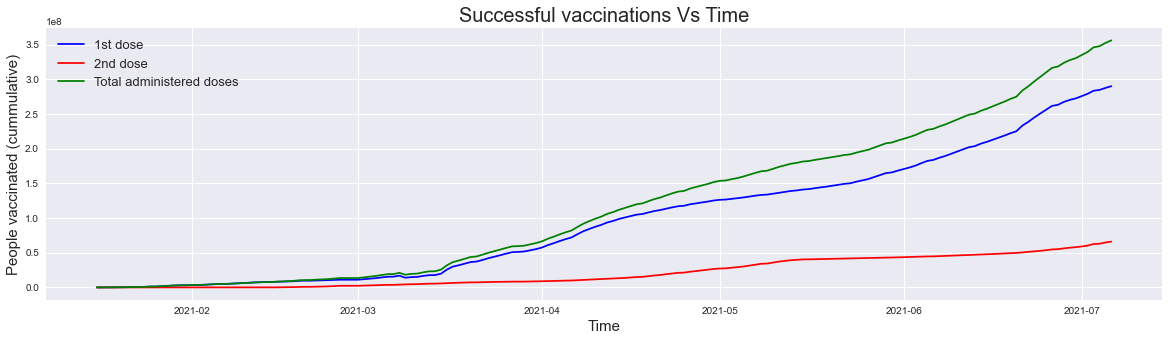

In [360]:
df_fdose=df_india['First Dose Administered']
df_sdose=df_india['Second Dose Administered']
df_tdose=df_india['Total Doses Administered']
df_time=df_india['Updated On']
plt.figure(figsize=(20,5))
plt.style.use("seaborn")
plt.xlabel('Time', fontsize=15)
plt.ylabel('People vaccinated (cummulative)', fontsize=15)
plt.title('Successful vaccinations Vs Time', fontsize=20)
plt.plot(df_time, df_fdose, color='blue', label='1st dose')
plt.plot(df_time, df_sdose, color='red', label='2nd dose')
plt.plot(df_time, df_tdose, color='green', label='Total administered doses')
plt.legend(prop={'size': 13})
plt.show()

From the above plot, we can draw a conclusion that the rollout of vaccines involving the 2nd dose has been quite slow as compared to the 1st dose.

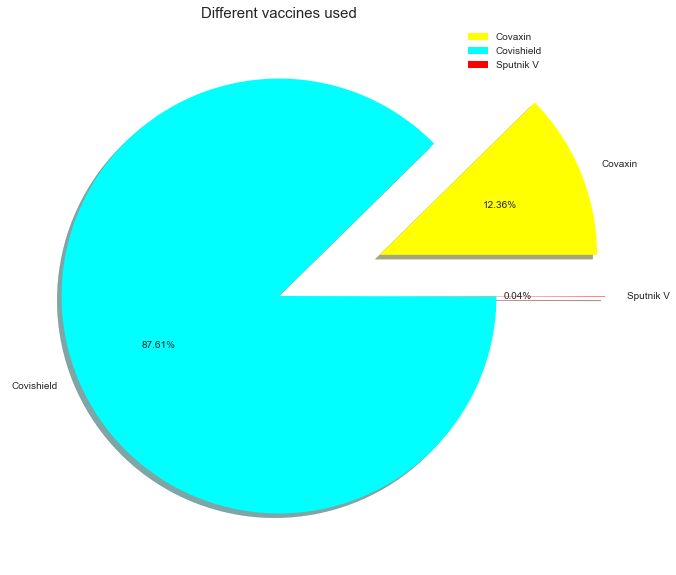

In [359]:
df_vaccinations=[df_india['Total Covaxin Administered'].iloc[-1], df_india['Total CoviShield Administered'].iloc[-1], df_india['Total Sputnik V Administered'].iloc[-1]]
pie_labels=['Covaxin', 'Covishield', 'Sputnik V']
plt.figure(figsize=(10,10))
plt.pie(df_vaccinations, labels=pie_labels, radius=1, autopct='%0.2f%%', colors=['yellow', 'cyan', 'red'], explode=[0.5,0,0.5], shadow=True)
plt.axis=('equal')
plt.title('Different vaccines used', fontsize=15)
plt.legend(loc='upper right')

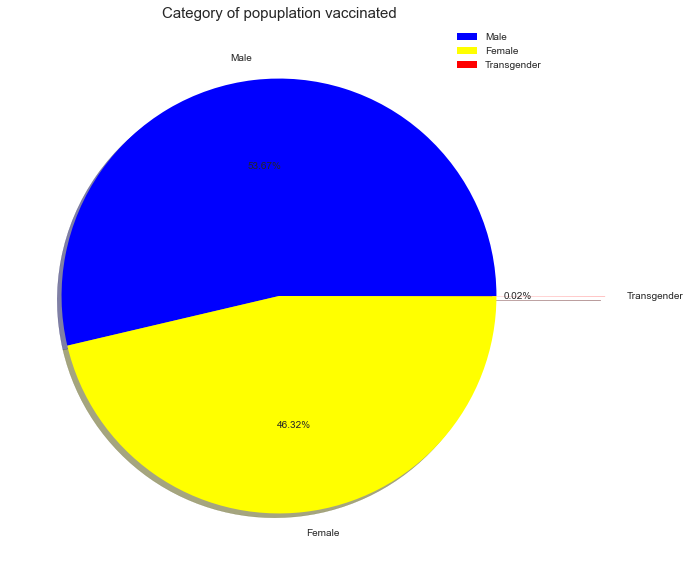

In [354]:
df_vaccinations=[df_india['Male(Individuals Vaccinated)'].iloc[-1], df_india['Female(Individuals Vaccinated)'].iloc[-1], df_india['Transgender(Individuals Vaccinated)'].iloc[-1]]
pie_labels=['Male', 'Female', 'Transgender']
plt.figure(figsize=(10,10))
plt.pie(df_vaccinations, labels=pie_labels, radius=1, autopct='%0.2f%%', colors=['blue', 'yellow', 'red'], explode=[0,0,0.5], shadow=True)
plt.axis=('equal')
plt.title('Category of popuplation vaccinated', fontsize=15)
plt.legend(loc='upper right')

##### Visualization completed 

##### Prediction using regression

In [337]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import PolynomialFeatures

A function has been defined below to calculate the number of days of vaccinations from the start of the vaccination campaign so as to convert the three independent variables (Day, Month, Year) into one. This is for the sake of simplifying the training data.

In [338]:
def cal_no_of_days(Day, Month, Year):
    return (Day-15) + (Month-1)*30 + (Year-1)*365 - (2020*365)

In [339]:
days=[]
for i in range(len(df_india)):
    day=cal_no_of_days(df_india['Day'][i], df_india['Month'][i], df_india['Year'][i])
    days.append(day)
df_days=pd.DataFrame(days)
print(pd.DataFrame({'Dates':df_india['Updated On'], 'number of days':days}))

         Dates  number of days
0   2021-01-16               1
1   2021-01-17               2
2   2021-01-18               3
3   2021-01-19               4
4   2021-01-20               5
..         ...             ...
167 2021-07-02             167
168 2021-07-03             168
169 2021-07-04             169
170 2021-07-05             170
171 2021-07-06             171

[172 rows x 2 columns]


In [361]:
x=df_days
y=df_india['Second Dose Administered']
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.1)
poly_reg=PolynomialFeatures(degree=2)
x_train=poly_reg.fit_transform(x_train)
x=poly_reg.fit_transform(x)
reg=LinearRegression()
reg.fit(x_train, y_train)
reg.fit(x, y)
score=reg.score(poly_reg.fit_transform(x_test), y_test)
print('score of model: ', score)

score of model:  0.9785501529936046


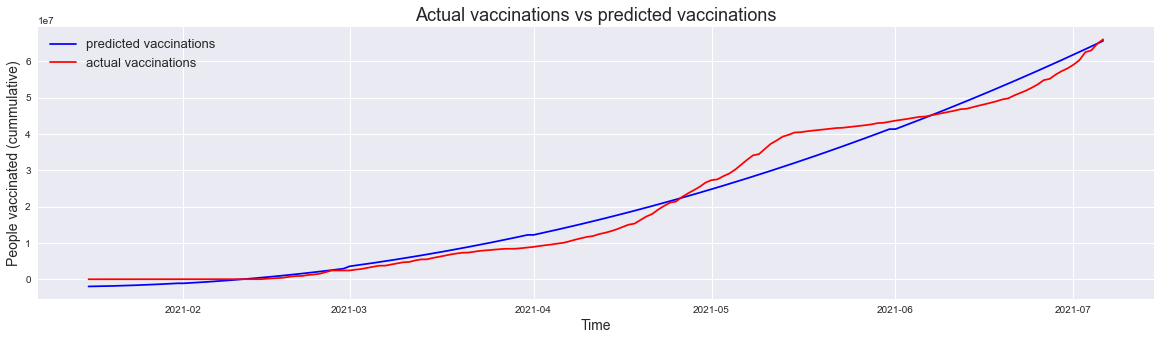

In [368]:
plt.figure(figsize=(20,5))
plt.title('Actual vaccinations vs predicted vaccinations', fontsize=18)
plt.xlabel('Time', fontsize=14)
plt.ylabel('People vaccinated (cummulative)', fontsize=14)
plt.plot(df_time, reg.predict(x), label='predicted vaccinations', color='blue')
plt.plot(df_time, df_sdose, label='actual vaccinations', color='red')
plt.legend(prop={'size': 13})

In [342]:
input_india_pop=1366400000
india_pop_above18=int(round(input_india_pop*60/100))
india_pop_above18

819840000

Only 60% of the total population of India has been considered as the population above the age of 18.

In [345]:
input_date=[7,7,2022] #Date_format:Day/Month/Year
day_number=cal_no_of_days(input_date[0], input_date[1], input_date[2])
if day_number < 0:
    day_number = 0
print('Day number: ', day_number)
df_day_number=[[day_number]]

Day number:  537


In [378]:
pop_fully_vaccinated = int(round(reg.predict(poly_reg.fit_transform(df_day_number))[0]))
if pop_fully_vaccinated < 0:
    print('Number of people completely vaccinated: ', 0)
elif pop_fully_vaccinated > india_pop_above18:
    print('Number of people completely vaccinated: {} i.e., all the people above the age of 18 have been vaccinated'.format(india_pop_above18))
else:
    print('Number of people completely vaccinated by the given date (in million): ', pop_fully_vaccinated/1000000)
print('Percentage of population of India completely vaccinated: {}%'.format(round(pop_fully_vaccinated*100/input_india_pop, 2)))

Number of people completely vaccinated by the given date (in million):  641.91856
Percentage of population of India completely vaccinated: 46.98%


##### Thus, the above data shows the number of people of India above the age of 18 that will have been completely vaccinated by the mentioned date.